# 後處理繪圖

## 匯入函式庫

In [7]:
import matplotlib.pyplot as plt
import numpy as np

## 波高紀錄

波高計 (Wave Gauge, WG) 之位置，可於 `controlDict` 中的 `functions` 設置。例如設定 6 個波高計，其 x 座標分別為
-2.74, -0.05, 0.07, 0.55, 1.9, 2.9 m:

    interfaceHeight1
    {
        type            interfaceHeight;
    
        libs            ("libfieldFunctionObjects.so");
        
        locations       ((-2.74 0 0) (-0.05 0 0) (0.07 0 0) (0.55 0 0) (1.9 0 0) (2.9 0 0));
        alpha           alpha.water;
        
        writeControl   timeStep;
        writeInterval  5;
    }



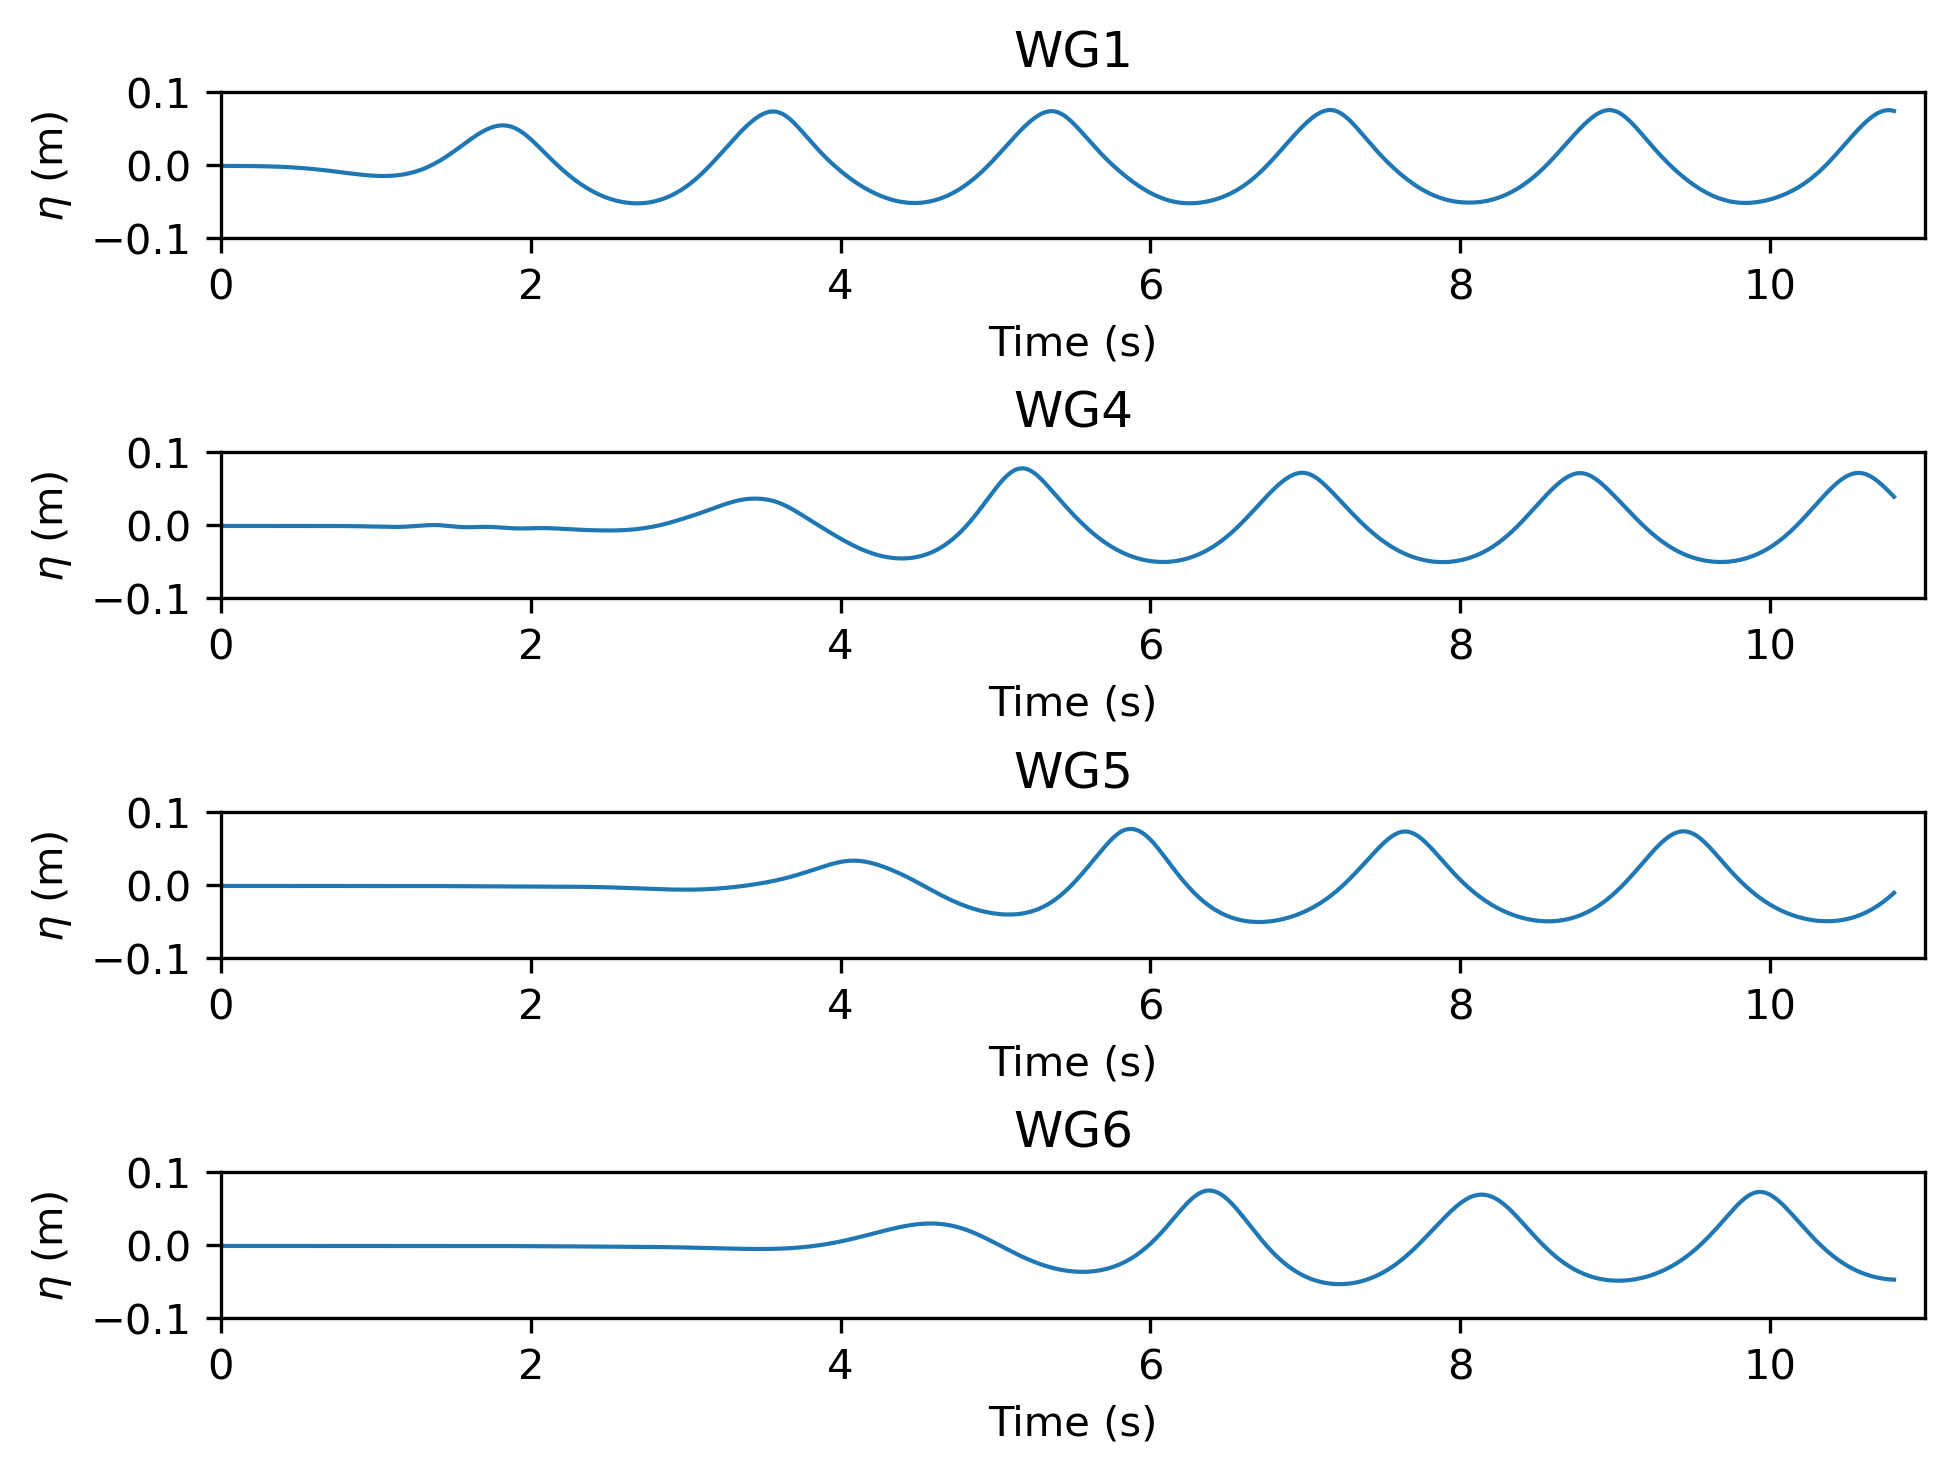

In [ ]:
(time,alpha1,height1,alpha2,height2,alpha3,height3,alpha3,height4,alpha5,height5,\
 alpha6,height6) = np.loadtxt('./interfaceHeight1/0/height.dat',unpack=True)

# Set figure and axes ...
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, dpi=300, layout='constrained')

# Plot ...
ax1.plot(time, height1, label="labels", linewidth=1)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('$\eta$ (m)');
ax1.set_xlim(0,11)
ax1.set_ylim(-0.1,0.1)
ax1.set_title("WG1")

ax2.plot(time, height4, label="labels", linewidth=1)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('$\eta$ (m)');
ax2.set_xlim(0,11)
ax2.set_ylim(-0.1,0.1)
ax2.set_title("WG4")

ax3.plot(time, height5, label="labels", linewidth=1)
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('$\eta$ (m)');
ax3.set_xlim(0,11)
ax3.set_ylim(-0.1,0.1)
ax3.set_title("WG5")

ax4.plot(time, height6, label="labels", linewidth=1)
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('$\eta$ (m)');
ax4.set_xlim(0,11)
ax4.set_ylim(-0.1,0.1)
ax4.set_title("WG6")

# Legends
#ax1.legend()
# Show the figure
plt.show()
 
fig1.savefig('height_1.pdf', transparent=False, bbox_inches='tight')

## 浮體 3DoF 運動位移

### 擷取 3DoF 位移量

若是使用 Overset Mesh 計算，無法在 `controlDict` 中設定 3DoF 位移量的輸出。須於計算完後再進行後處理，從 `log.overInterDyMFoam` 中擷取出位移量。

建議在 `postProcessing` 目錄中建立 `sixDoF_History` 資料夾，將 `log.overInterDyMFoam` 與 `extractMulti.sh` 複製至其中，並在其中新增資料夾 `logs`。第一次執行時需設定 script 的權限：

    chmod u+x extractMulti.sh

使用以下指令，即可擷取出重心之位移量 (`t_vs_CoM`)、各 DoF 之旋轉角度 (`t_vs_orientation`)、速度向量 (`t_vs_linearV`) 以及角速度 (`t_vs_angularV`)，存在資料夾 `logs` 中:

    extractMulti.sh log.overInterDyMFoam

### 3DoF 位移繪圖

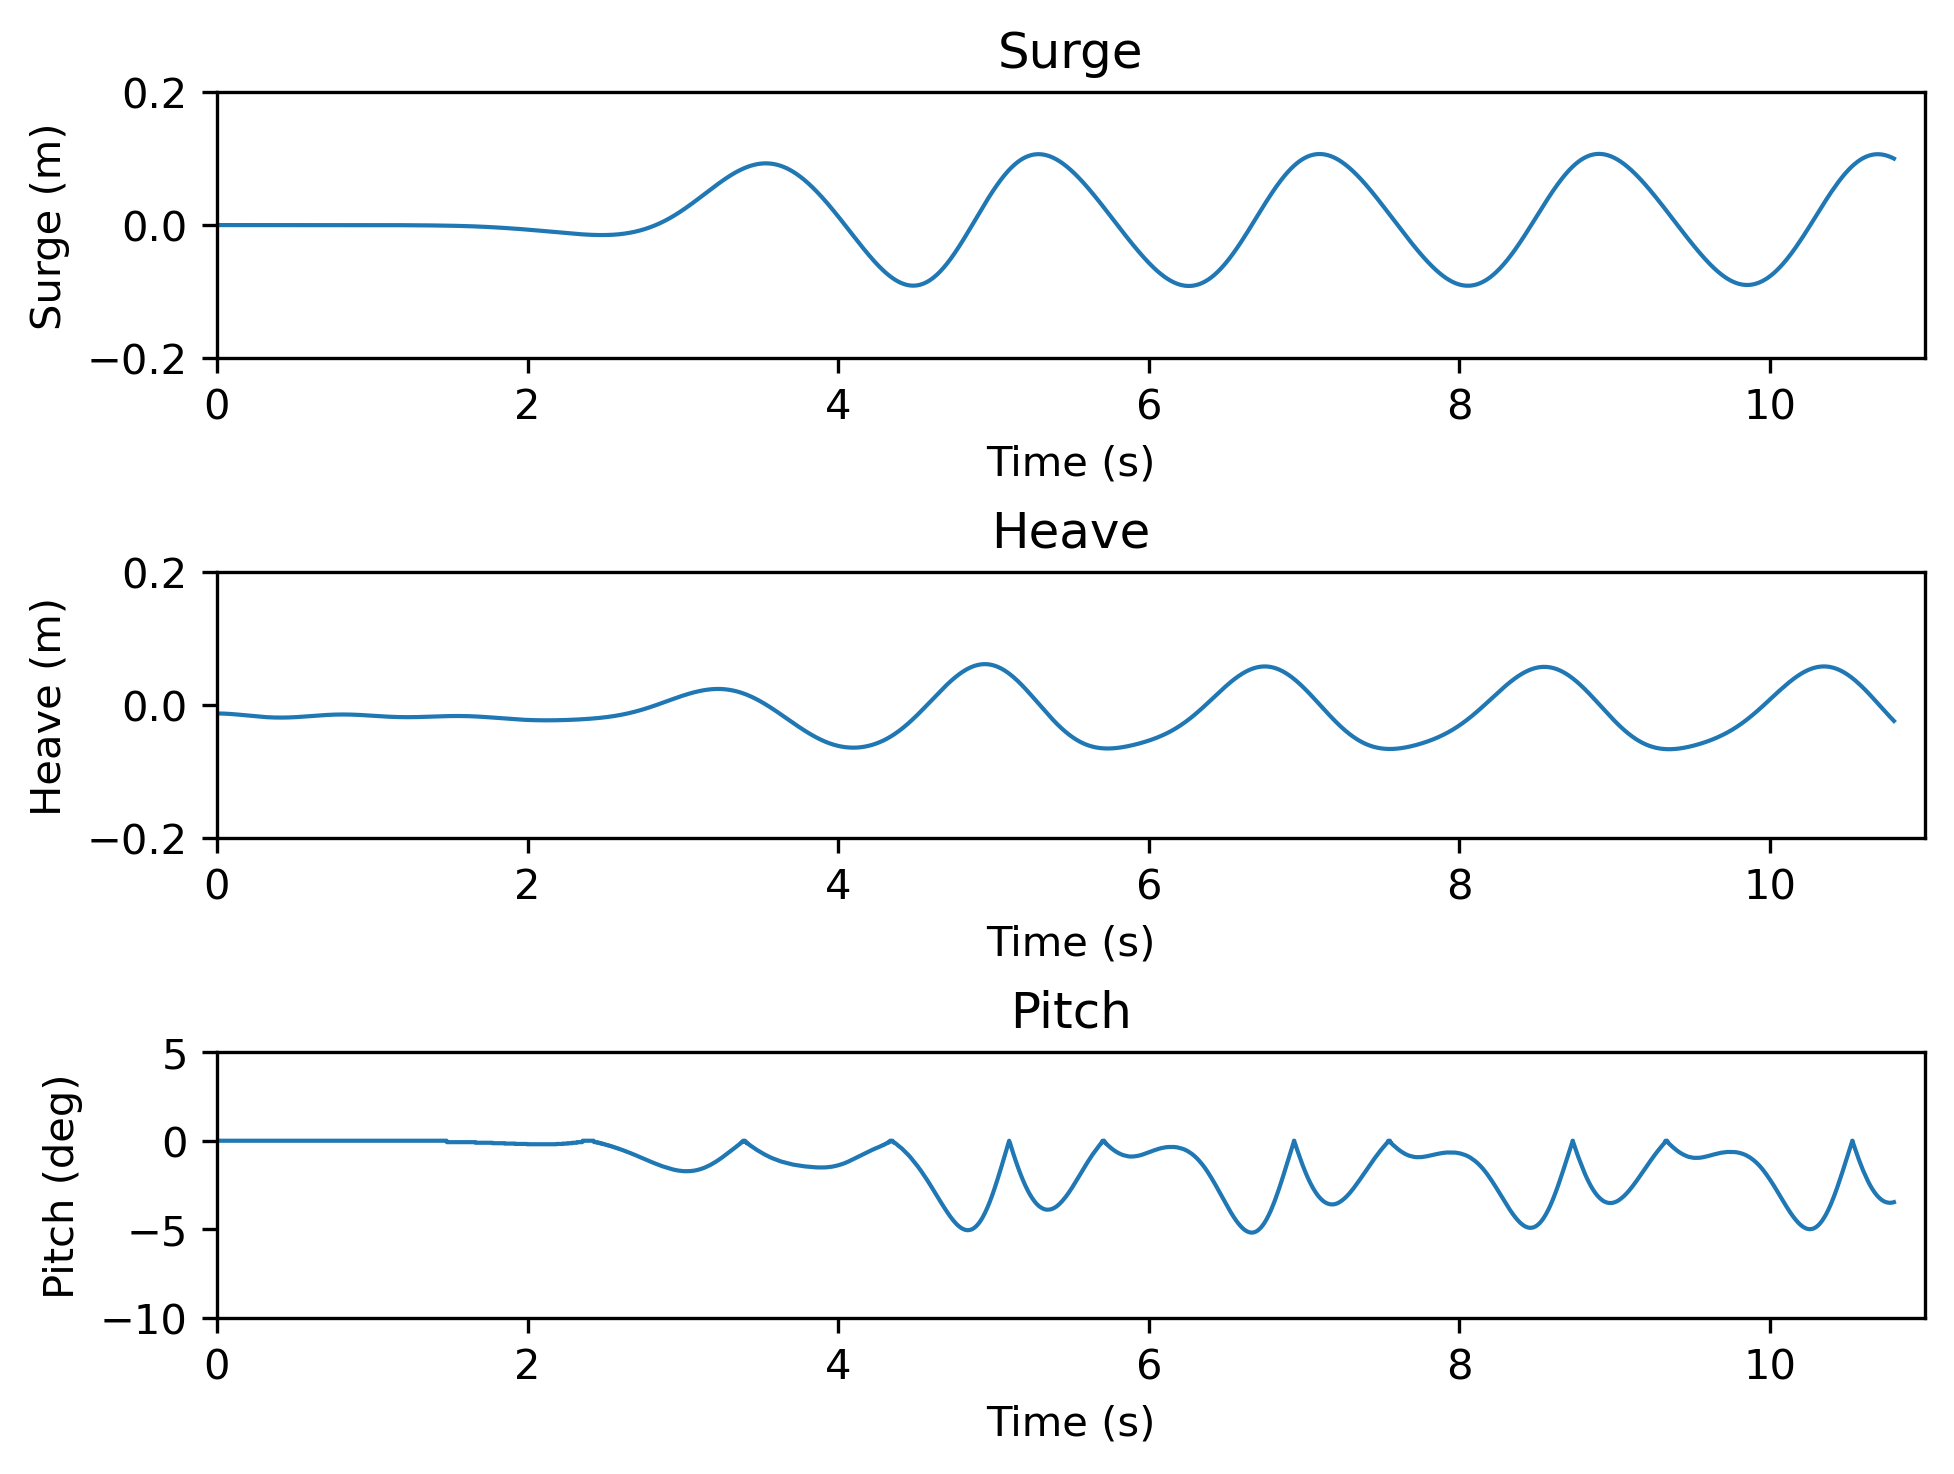

In [17]:
(time,surge,ymotion,heave) = np.loadtxt('./sixDoF_History/logs/t_vs_CoM',unpack=True)
(time2,y1,y2,y3,y4,y5,y6,y7,y8,y9) = np.loadtxt('./sixDoF_History/logs/t_vs_orientation',unpack=True)

# Set figure and axes ...
fig1, (ax1, ax2, ax3) = plt.subplots(3, 1, dpi=300, layout='constrained')

# Plot ...
ax1.plot(time, surge, label="labels", linewidth=1)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Surge (m)');
ax1.set_xlim(0,11)
ax1.set_ylim(-0.2,0.2)
ax1.set_title("Surge")

ax2.plot(time, heave, label="labels", linewidth=1)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Heave (m)');
ax2.set_xlim(0,11)
ax2.set_ylim(-0.2,0.2)
ax2.set_title("Heave")

ax3.plot(time2, -np.arccos(y1)*180/np.pi, label="labels", linewidth=1)
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Pitch (deg)');
ax3.set_xlim(0,11)
ax3.set_ylim(-10,5)
ax3.set_title("Pitch")

# Legends
#ax1.legend()
# Show the figure
plt.show()

fig1.savefig('bodyMotion.pdf', transparent=False, bbox_inches='tight')

## 繫纜錨定張力

Overset 案例之輸出檔案為

    background/Mooring/lines_V2_point.out

以下程式為繪製繫纜 1 及 3 之底床錨定處之張力 (N)。

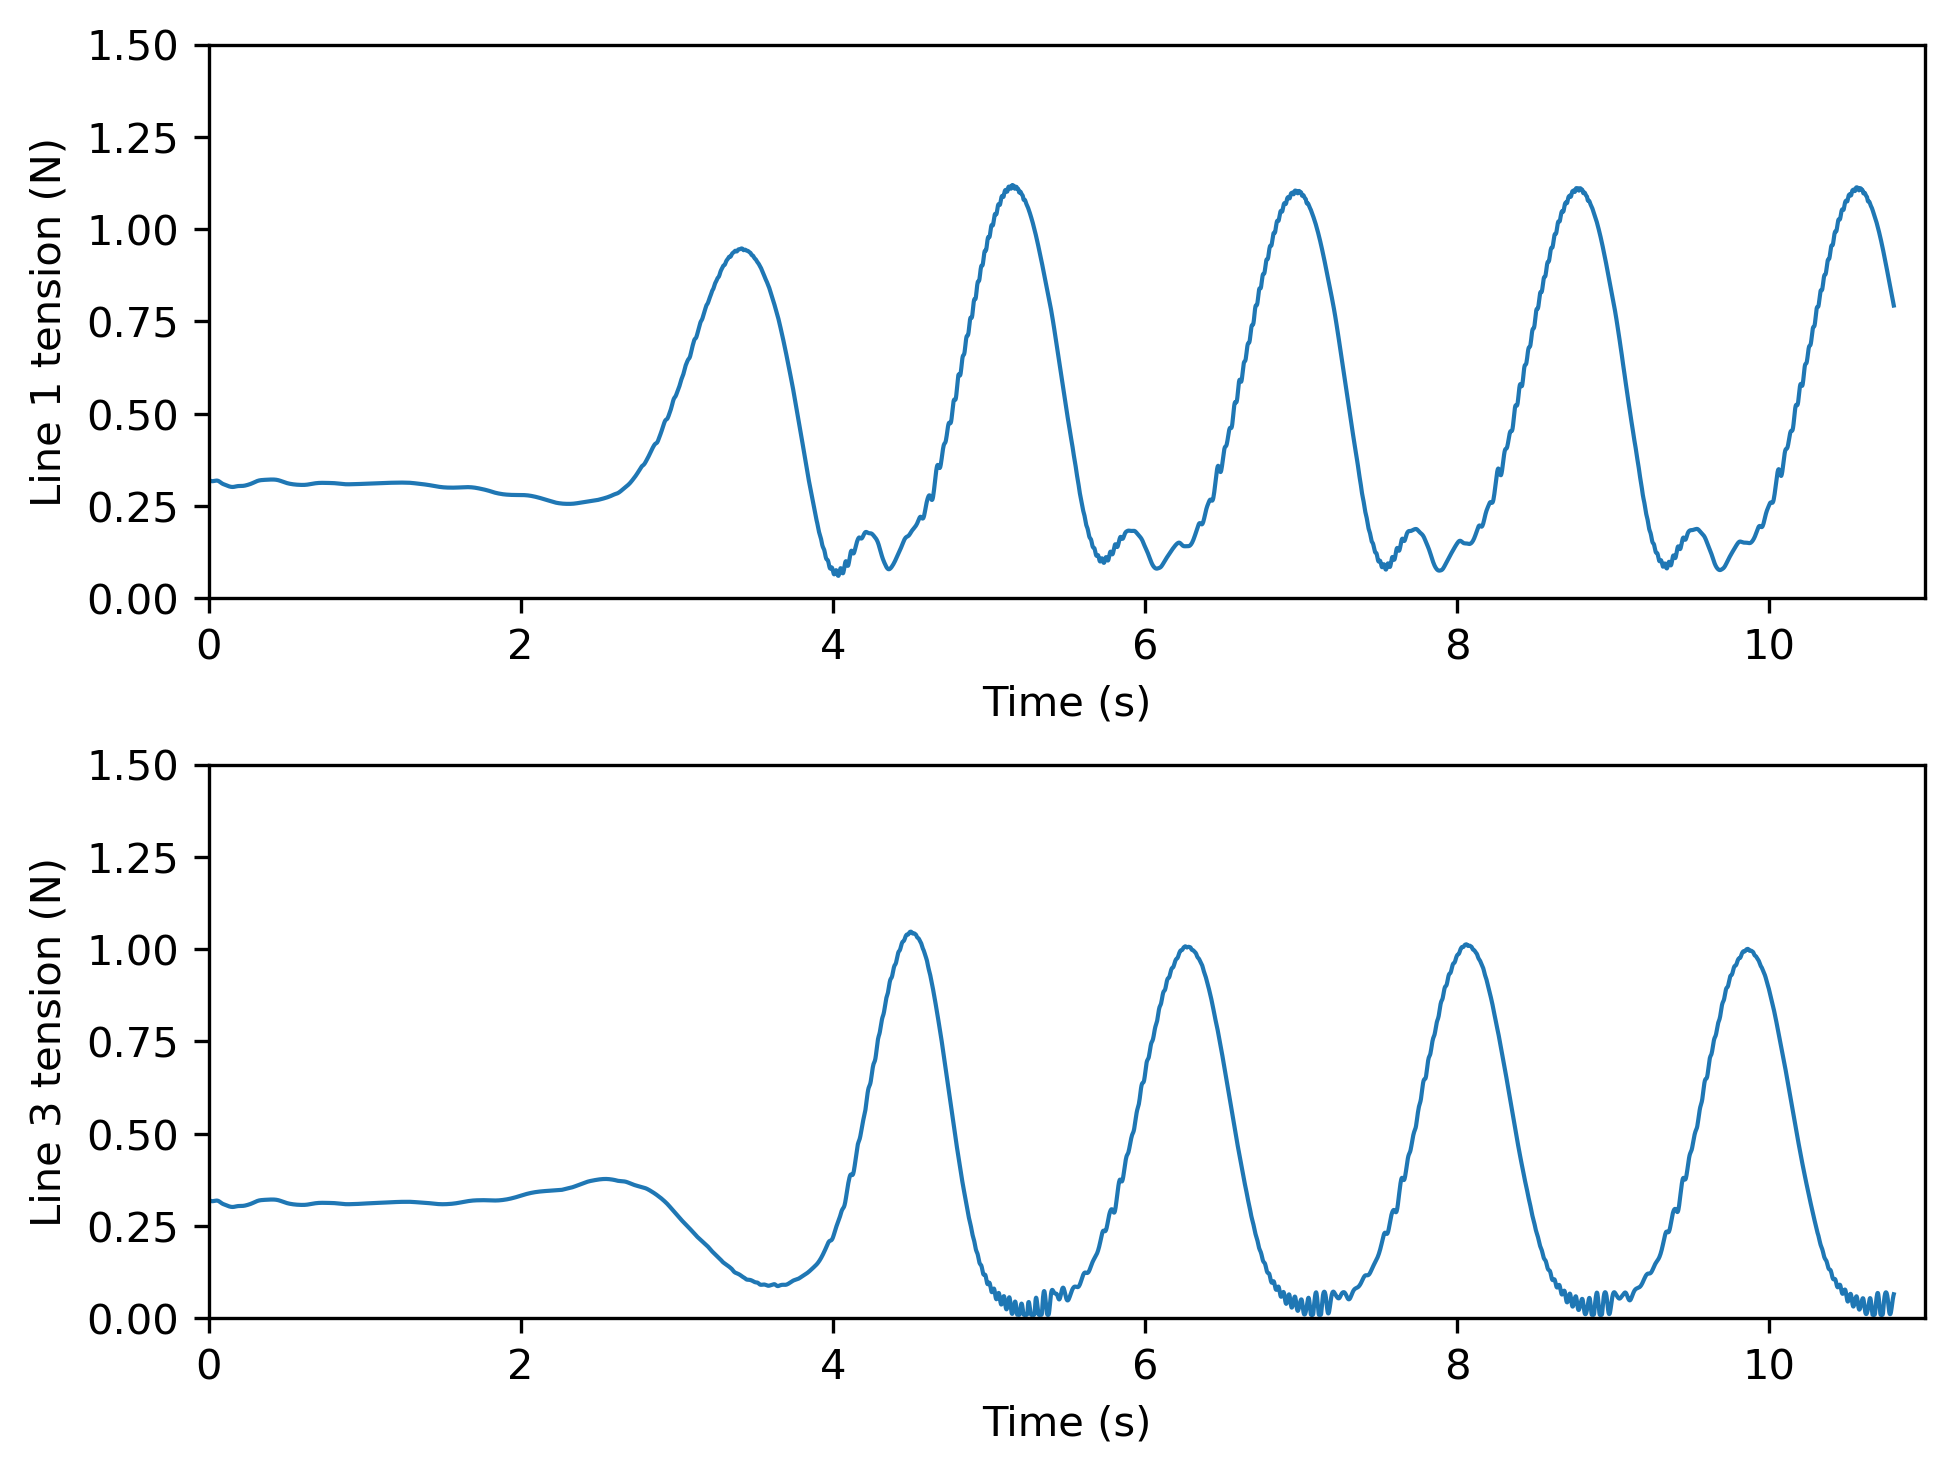

In [24]:
(time,FairTen1,FairTen3,AnchTen1,AnchTen3,L1N1pZ,L3N1pZ) = np.loadtxt('../Mooring/lines_v2_point.out', skiprows=2, unpack=True)

# Set figure and axes ...
fig1, (ax1, ax2) = plt.subplots(2, 1, dpi=300, layout='constrained')

# Plot ...
ax1.plot(time, AnchTen1, label="labels", linewidth=1)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Line 1 tension (N)');
ax1.set_xlim(0,11)
ax1.set_ylim(0,1.5)

ax2.plot(time, AnchTen3, label="labels", linewidth=1)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Line 3 tension (N)');
ax2.set_xlim(0,11)
ax2.set_ylim(0,1.5)

# Legends
#ax1.legend()
# Show the figure
plt.show()

fig1.savefig('lineAnchTen.pdf', transparent=False, bbox_inches='tight')